# The Street View House Numbers (SVHN) Dataset

## Содержание

1. [Подключение необходимых библиотек и загрузка датасета](#Подключение-необходимых-библиотек-и-загрузка-датасета) 
2. [Описание датасета](#Описание-датасета)
    1. [Структура](#Структура)
    2. [Вывод изображений из датасета](#Вывод-изображений-из-датасета)
3. [Задание №1](#Задание-№1)
    1. [Задача бинарной классификации](#Задача-бинарной-классификации)
        1. [Предобработка данных](#Предобработка-данных)
        2. [Обучение модели](#Обучение-модели)
        3. [Прогнозирование](#Прогнозирование)
        4. [Точность полученной модели](#Точность-полученной-модели)
        5. [Обучение множества моделей с гиперпараметром от k=1 до k=max](#Обучение-множества-моделей-с-гиперпараметром-от-k=1-до-k=max)
    2. [Задача множественной классификации](#Задача-множественной-классификации)
        1. [Предобработка данных](#Предобработка-данных.)
        2. [Обучение модели](#Обучение-модели.)
        3. [Прогнозирование](#Прогнозирование.)
        4. [Точность полученной модели](#Точность-полученной-модели.)
        5. [Обучение множества моделей с гиперпараметром от k=1 до k=max](#Обучение-множества-моделей-с-гиперпараметром-от-k=1-до-k=max.)
4. [Задание №2](#Задание-№2)
    1. [Поиск оптимального значения гиперпараметра методом кросс-валидации](#Поиск-оптимального-значения-гиперпараметра-методом-кросс-валидации)
    2. [Прогноз на тестовых данных с моделью, обученной при оптимальном значении k](#Прогноз-на-тестовых-данных-с-моделью,-обученной-при-оптимальном-значении-k)
    3. [Точность модели при оптимальном k](#Точность-модели-при-оптимальном-k)

## Подключение необходимых библиотек и загрузка датасета

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataset import load_svhn
from sklearn.model_selection import train_test_split

%matplotlib notebook

train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

## Описание датасета
### Структура
Структура датасета следующая:
1. `train_X[i]` — i-ое изображение датасета;
2. `train_X[i][row][col]` — вернет список из 3 элементов, где каждый элемент является интенсивностью цвета r, g, b соответственно, row*col пикселя i-ого изображения;

Подробную информацию о датасете можно найти [здесь](http://ufldl.stanford.edu/housenumbers/).

In [2]:
train_X.shape

(1000, 32, 32, 3)

### Вывод изображений из датасета

[[6 4 0 8 0 6]
 [0 1 5 1 1 1]
 [7 0 3 0 3 3]
 [7 3 1 4 1 9]
 [6 4 1 3 0 3]
 [2 2 7 7 1 4]]


<IPython.core.display.Javascript object>


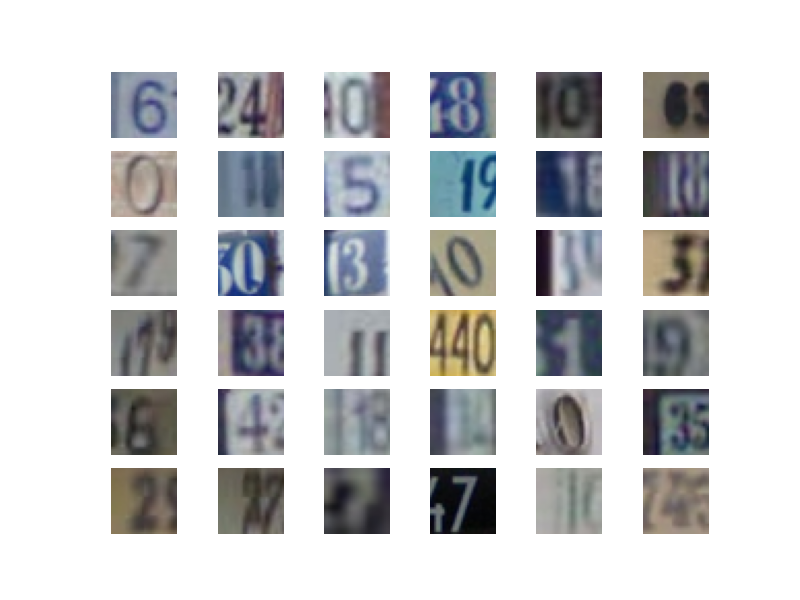

In [3]:
print(train_y[:36].reshape(6, 6))

plot_index = 1
for i in range(36):
    plt.subplot(6, 6, plot_index)
    image = train_X[i]
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plot_index += 1

## Задание №1
### Постановка задачи
Обучить модель и получить прогнозы для бинарной и мультиклассовой классификации набора данных street view house numbers. Вычислить значения метрик точности (accuracy, precision, recall, fscore) при трех разных значениях гиперпараметра k.
### Задача бинарной классификации
#### Предобработка данных

In [4]:
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask]

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask]


# Преобразование в одномерный массив [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

#### Обучение модели

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
model.fit(binary_train_X, binary_train_y)

KNeighborsClassifier(n_neighbors=4)

#### Прогнозирование

In [6]:
y_pred = model.predict(binary_test_X)

print(f"{binary_test_y} -> Метки тестового набора")
print(f"{y_pred} -> Прогнозы для тестового набора")

[0 0 0 9 9 0 0 0 0 9 0 9 0 0 0 0] -> Метки тестового набора
[0 0 0 0 0 0 9 0 0 0 9 0 0 0 0 0] -> Прогнозы для тестового набора


#### Точность полученной модели

In [7]:
from sklearn.metrics import precision_recall_fscore_support

print('accuracy: {:.2f}'.format(model.score(binary_test_X, binary_test_y)))

print(
    "precision: {}\
    \nrecall: {}\
    \nfscore: {}\
    \nsupport: {}".format(*precision_recall_fscore_support(binary_test_y, y_pred, average='macro'))
)

accuracy: 0.62
precision: 0.35714285714285715    
recall: 0.4166666666666667    
fscore: 0.3846153846153846    
support: None


#### Обучение множества моделей с гиперпараметром от k=1 до k=max

<IPython.core.display.Javascript object>


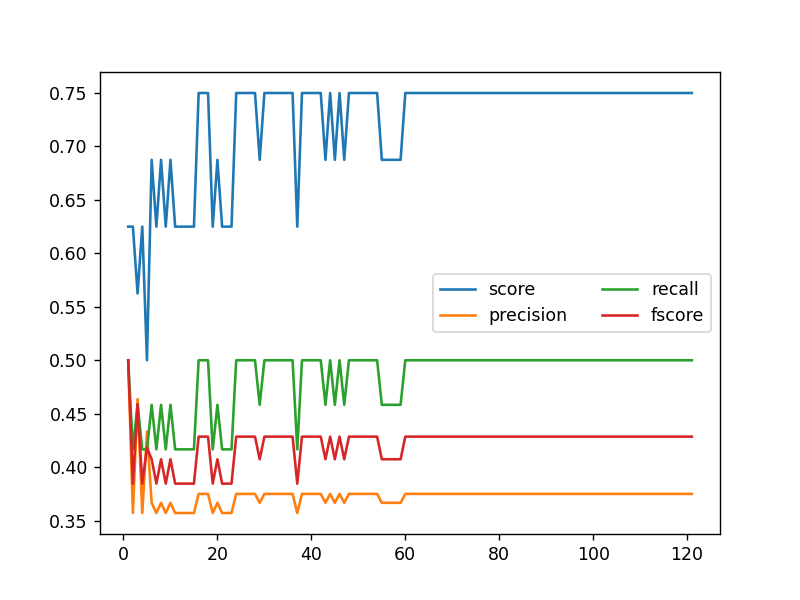

In [8]:
accuracies, precision, recall, fscore = [], [], [], []

for k in range(len(binary_train_X)):
    model = KNeighborsClassifier(n_neighbors=k+1)
    model.fit(binary_train_X, binary_train_y)
    y_pred = model.predict(binary_test_X)
    
    # Вычисление ошибок
    accuracies.append(model.score(binary_test_X, binary_test_y))
    pr, rec, fs, sup = precision_recall_fscore_support(binary_test_y, y_pred, average='macro', warn_for=tuple())

    precision.append(pr)
    recall.append(rec)
    fscore.append(fs)

plt.plot(np.arange(1, 122), accuracies, label="score")
plt.plot(np.arange(1, 122), precision, label="precision")
plt.plot(np.arange(1, 122), recall, label="recall")
plt.plot(np.arange(1, 122), fscore, label="fscore")

plt.legend(loc='center right', frameon=True, ncol=2)
plt.show()

### Задача множественной классификации

#### Предобработка данных.

In [9]:
# Преобразование в одномерный массив [num_samples, 32*32*3]
mult_train_X = train_X.reshape(train_X.shape[0], -1)
mult_test_X = test_X.reshape(test_X.shape[0], -1)

#### Обучение модели.

In [10]:
model = KNeighborsClassifier(n_neighbors=4)

model.fit(mult_train_X, train_y)

KNeighborsClassifier(n_neighbors=4)

#### Прогнозирование.

In [11]:
y_pred = model.predict(mult_test_X)

print(f"Метки тестового набора:\n{test_y}\n")
print(f"Прогнозы для тестового набора:\n{y_pred}")

Метки тестового набора:
[2 1 3 0 2 5 0 1 7 1 6 7 0 9 9 1 1 4 0 5 1 6 0 2 4 3 0 8 4 8 6 3 5 3 5 4 6
 5 0 2 1 2 4 1 7 5 9 7 6 4 4 8 1 3 4 0 7 2 5 6 8 1 2 3 3 9 0 3 2 2 5 2 4 1
 7 4 0 3 7 2 7 1 5 6 3 7 2 8 8 1 0 2 4 3 2 7 3 0 1 8]

Прогнозы для тестового набора:
[2 1 5 0 1 3 0 1 1 1 1 5 0 4 0 0 1 0 0 9 1 1 0 1 1 3 0 1 1 1 1 5 2 1 1 2 0
 9 0 1 4 2 1 4 2 4 5 2 8 8 1 8 1 5 1 0 1 1 2 1 8 4 0 1 2 0 3 3 1 2 1 0 2 4
 7 1 0 6 7 0 1 2 1 0 0 3 0 1 1 1 1 4 2 8 1 7 1 5 0 2]


#### Точность полученной модели.

In [12]:
print('accuracy: {:.2f}'.format(model.score(mult_test_X, test_y)))

print(
    "precision: {}\
    \nrecall: {}\
    \nfscore: {}\
    \nsupport: {}".format(*precision_recall_fscore_support(test_y, y_pred, average='macro'))
)

accuracy: 0.26
precision: 0.26485298485298486    
recall: 0.22166666666666668    
fscore: 0.20723524841171898    
support: None


#### Обучение множества моделей с гиперпараметром от k=1 до k=max.

<IPython.core.display.Javascript object>


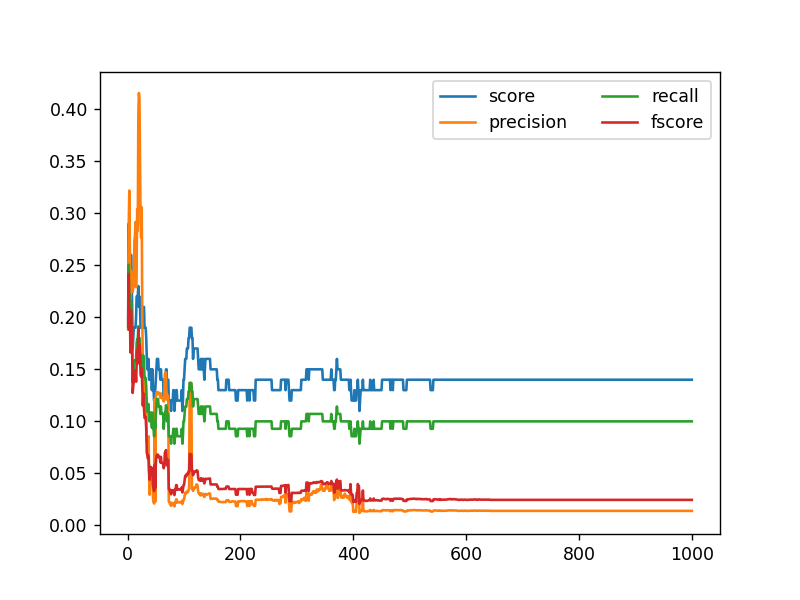

In [13]:
# Осторожно! Длительные вычисления. На моем железе ячейка вычисляется ~1 мин. 10 сек.

accuracies, precision, recall, fscore = [], [], [], []

for k in range(len(mult_train_X)):
    model = KNeighborsClassifier(n_neighbors=k+1)
    model.fit(mult_train_X, train_y)
    y_pred = model.predict(mult_test_X)
    
    # Вычисление ошибок
    accuracies.append(model.score(mult_test_X, test_y))
    pr, rec, fs, sup = precision_recall_fscore_support(test_y, y_pred, average='macro', warn_for=tuple())

    precision.append(pr)
    recall.append(rec)
    fscore.append(fs)

plt.plot(np.arange(1, 1001), accuracies, label="score")
plt.plot(np.arange(1, 1001), precision, label="precision")
plt.plot(np.arange(1, 1001), recall, label="recall")
plt.plot(np.arange(1, 1001), fscore, label="fscore")

plt.legend(loc='upper right', frameon=True, ncol=2)
plt.show()

## Задание №2
### Постановка задачи
Реализовать метод кросс-валидации для подбора оптимального значения гиперпараметра k из массива k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]. Разбить датасет на части с помощью функции [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) (from sklearn.model_selection), вычислить средние метрики (accuracy, precision, recall, fscore) для каждого k из массива k_choices на валидационных данных. Сделать прогноз на тестовых данных с моделью, обученной при оптимальном значении k.
### Поиск оптимального значения гиперпараметра методом кросс-валидации

In [14]:
import statistics as stat
from sklearn.model_selection import StratifiedKFold

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
accuracies = []

folds = StratifiedKFold(n_splits=5)
for k in k_choices:
    accuracy = []
    for train_index, test_index in folds.split(mult_train_X, train_y):
        X_train_folds, y_train_folds = mult_train_X[train_index], train_y[train_index]
        X_test_fold, y_test_fold = mult_train_X[test_index], train_y[test_index]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_folds, y_train_folds)
        
        accuracy.append(model.score(X_test_fold, y_test_fold))
    accuracies.append(stat.mean(accuracy))

best_k = k_choices[accuracies.index(max(accuracies))]

<IPython.core.display.Javascript object>


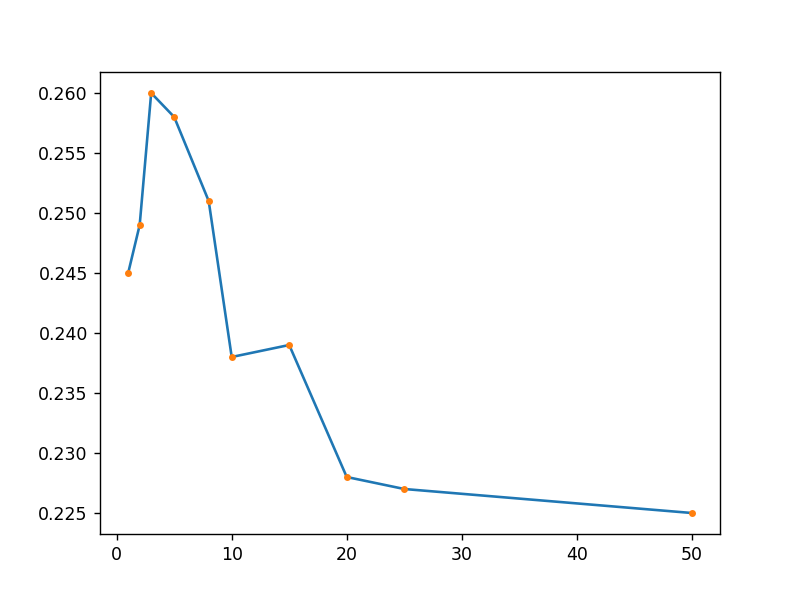

Best k = 3


In [15]:
plt.plot(k_choices, accuracies, k_choices, accuracies, '.', label="score")
print(f"Best k = {best_k}")

### Прогноз на тестовых данных с моделью, обученной при оптимальном значении k

In [16]:
model =  KNeighborsClassifier(n_neighbors=best_k)
model.fit(mult_train_X, train_y)

y_pred = model.predict(mult_test_X)

print(f"Метки тестового набора:\n{test_y}\n")
print(f"Прогнозы для тестового набора:\n{y_pred}")

Метки тестового набора:
[2 1 3 0 2 5 0 1 7 1 6 7 0 9 9 1 1 4 0 5 1 6 0 2 4 3 0 8 4 8 6 3 5 3 5 4 6
 5 0 2 1 2 4 1 7 5 9 7 6 4 4 8 1 3 4 0 7 2 5 6 8 1 2 3 3 9 0 3 2 2 5 2 4 1
 7 4 0 3 7 2 7 1 5 6 3 7 2 8 8 1 0 2 4 3 2 7 3 0 1 8]

Прогнозы для тестового набора:
[2 1 5 0 1 3 0 1 1 1 1 5 0 4 0 0 1 1 0 1 1 1 0 3 1 3 0 1 1 1 1 5 2 1 1 2 0
 1 0 1 4 2 0 4 2 4 6 2 1 4 1 8 1 0 1 1 1 5 2 1 1 1 0 1 2 0 3 1 1 2 1 0 2 4
 1 1 0 6 7 0 0 3 1 0 0 0 0 2 1 1 1 4 2 3 1 7 1 1 0 3]


### Точность модели при оптимальном k

In [17]:
print('accuracy: {:.2f}'.format(model.score(mult_test_X, test_y)))

print(
    "precision: {}\
    \nrecall: {}\
    \nfscore: {}\
    \nsupport: {}".format(*precision_recall_fscore_support(test_y, y_pred, average='macro', warn_for=tuple()))
)

accuracy: 0.25
precision: 0.3216873706004141    
recall: 0.2052813852813853    
fscore: 0.18785971338602916    
support: None
